In [1]:
import rebound
import numpy as np

In [2]:
tt = 0.0761007811
aa = 0.22882
ee = 0.52087
ma = 1.0479
mb = 1.0208
#aa = 20.0
#ee = 0.0
#ma = 5.0
#mb = 5.0
print ((ma+mb)*tt**2)**(1./3.)

0.228818911026


The Kepler 34AB binary system features two G-type stars of 1.05 and 1.02 solar masses, separated by an average of 0.23 AU. They orbit each other every 28 days, with an eccentricity of 0.52.

In [3]:
sim = rebound.Simulation()
#sim.add(m=1.e-32)

We need to compute the periastron and apastron distances (rp & ra) between the stars. Once we have that, we can transform to a barycentric coordinate and find periapsi and apoapsi for each star relative to the barycenter.

In [4]:
rp = aa*(1-ee)
ra = aa*(1+ee)
rap = mb*rp/(ma+mb)
rbp = ma*rp/(ma+mb)
raa = mb*ra/(ma+mb)
rba = ma*ra/(ma+mb)

In [5]:
print rp,ra
print rap,rbp,raa,rba
print rap+rbp,raa+rba

0.1096345266 0.3480054734
0.0540991563558 0.0555353702442 0.171723298326 0.176282175074
0.1096345266 0.3480054734


Next we need the semimajor axes for each star in the barycentric frame of reference. With those, we can compute the periapsis velocity of each star. We'll start each star at its periapsis. The stars are always diagrammatically opposed, so we know they will both be at periapsis at the same time.

In [6]:
aaa = mb*aa/(ma+mb)
aab = ma*aa/(ma+mb)
vap = np.sqrt((1+ee)*mb/((1-ee)*aaa))
vbp = -np.sqrt((1+ee)*ma/((1-ee)*aab))
#vap = np.sqrt((ma+mb)/aaa*(1-ee**2))
#vbp = -np.sqrt((ma+mb)/aab*(1-ee**2))

In [7]:
print aaa,aab
print vap,vbp

0.112911227341 0.115908772659
5.35699364329 -5.35699364329


In [8]:
a11 = -mb/(vap**2-2*mb/rap)   # Hanno's way
a12 = mb/vap**2*(1+ee)/(1-ee) # My way
print a11,a12

0.112911227341 0.112911227341


In [9]:
#sim.add(m=ma,x=rap,vy=vap)
#sim.add(m=mb,x=-rbp,vy=vbp)
sim.add(m=ma)
sim.add(m=mb,a=aa,e=ee,l=300.1970*np.pi/180,primary=sim.particles[0])

In [10]:
com=sim.calculate_com()
print com

<rebound.Particle object, id=0 m=2.0687 x=-0.058114621503 y=-0.096383251154 z=0.0 vx=1.48845661179 vy=0.00784861130666 vz=0.0>


Just to be safe, we explicitly tell the simulation that we'll be running in the center-of-momentum frame.

In [11]:
sim.move_to_com()

In [12]:
for o in sim.calculate_orbits(barycentric=True): print o
print sim.particles[0]
print sim.particles[1]

<rebound.Orbit instance, a=0.0604049465558 e=0.937180352155 inc=0.0 Omega=0.0 omega=0.986772619167 f=-3.10015732985>
<rebound.Particle object, id=0 m=1.0479 x=0.058114621503 y=0.096383251154 z=0.0 vx=-1.48845661179 vy=-0.00784861130666 vz=0.0>
<rebound.Particle object, id=0 m=1.0208 x=-0.0596574371797 y=-0.0989420149729 z=0.0 vx=1.52797186863 vy=0.0080569747142 vz=0.0>


Now we can add out planet, Kepler 34ABb. It has 0.22 Jupiter masses (about 70 earth masses), an inclination relative to Kepler 34AB of 0.4966 degrees, a semimajor axis of 1.09 AU, a period of 288 days or so, and an eccentricity of 0.182. 

In [13]:
ii = 0.4966*np.pi/180.
mp = 2.1e-4
ap = 1.0896
tp = 0.79075154
ep = 0.182
sim.add(m=mp,a=ap,e=ep,inc=ii,Omega=-1.74*np.pi/180.)
print sim.particles[2].calculate_orbit(primary=sim.calculate_com())
sim.move_to_com()

<rebound.Orbit instance, a=1.08885070831 e=0.181520180358 inc=0.00866730506539 Omega=-0.0303687289847 omega=0.0 f=1.49011611938e-08>


In [14]:
%matplotlib inline

In [15]:
tmax = 100*2*np.pi
times= np.linspace(0,tmax,num=100000)
k34a = np.zeros([2,len(times)])
k34b = np.zeros([2,len(times)])
k34p = np.zeros([2,len(times)])
i=0
while i<len(times):
    sim.integrate(times[i])
    sim.move_to_com()
    k34a[0][i]=sim.particles[0].x
    k34a[1][i]=sim.particles[0].y
    k34b[0][i]=sim.particles[1].x
    k34b[1][i]=sim.particles[1].y
    k34p[0][i]=sim.particles[2].x
    k34p[1][i]=sim.particles[2].y
    i+=1
    

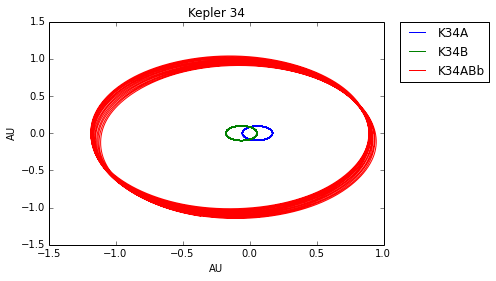

In [16]:
from pylab import *
k34ao = plot(k34a[0][0:10000],k34a[1][0:10000],label='K34A')
k34bo = plot(k34b[0][0:10000],k34b[1][0:10000],label='K34B')
k34po = plot(k34p[0][0:10000],k34p[1][0:10000],label='K34ABb')
ylabel('AU')
xlabel('AU')
title('Kepler 34')
l=legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [17]:
global k34a,k34b,k34p
def plotorbit(year):
    t1=year*1000
    t2=(year+1)*1000
    k34ao = plot(k34a[0][t1:t2],k34a[1][t1:t2],label='K34A')
    k34bo = plot(k34b[0][t1:t2],k34b[1][t1:t2],label='K34B')
    k34po = plot(k34p[0][t1:t2],k34p[1][t1:t2],label='K34ABb')
    xlim(-1.5,1.5)
    ylim(-1.5,1.5)
    xlabel('AU')
    ylabel('AU')
    title('Kepler 34 year '+str(year))
    l=legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

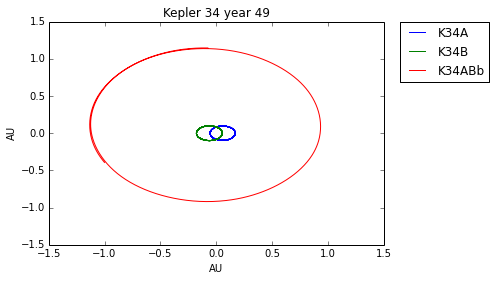

In [18]:
from ipywidgets import *
n=interact(plotorbit,year=(0,99,1))

# Introducing another planet

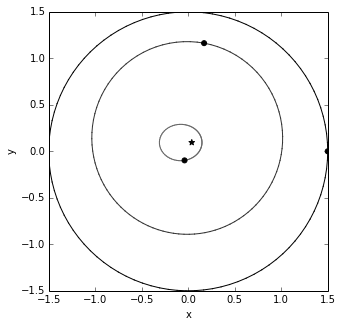

In [19]:
mp2 = mp
ap2 = 1.5
sim.add(m=mp2,a=ap2,e=0.,primary=sim.calculate_com(),id=4)
sim.move_to_com()
orb=rebound.OrbitPlot(sim)


In [20]:
years= 200
tmax = years*2*np.pi
times= np.linspace(0,tmax,num=years*1000)
k34a = np.zeros([2,len(times)])
k34b = np.zeros([2,len(times)])
k34abb = np.zeros([2,len(times)])
k34abc = np.zeros([2,len(times)])
i=0
while i<len(times):
    sim.integrate(times[i])
    sim.move_to_com()
    k34a[0][i]=sim.particles[0].x
    k34a[1][i]=sim.particles[0].y
    k34b[0][i]=sim.particles[1].x
    k34b[1][i]=sim.particles[1].y
    k34abb[0][i]=sim.particles[2].x
    k34abb[1][i]=sim.particles[2].y
    k34abc[0][i]=sim.particles[3].x
    k34abc[1][i]=sim.particles[3].y
    i+=1
    

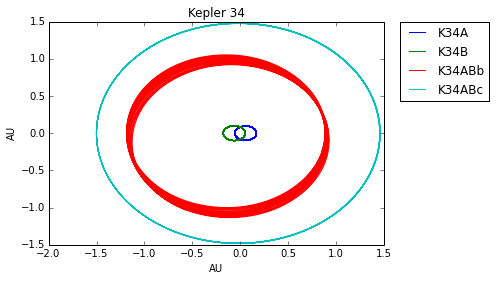

In [21]:
k34ao = plot(k34a[0][0:10000],k34a[1][0:10000],label='K34A')
k34bo = plot(k34b[0][0:10000],k34b[1][0:10000],label='K34B')
k34abbo = plot(k34abb[0][0:10000],k34abb[1][0:10000],label='K34ABb')
k34abco = plot(k34abc[0][0:10000],k34abc[1][0:10000],label='K34ABc')
ylabel('AU')
xlabel('AU')
title('Kepler 34')
l=legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [22]:
global k34abb,k34abc
def plotorbit2(year):
    t1=year*1000
    t2=(year+1)*1000 + 300
    k34ao = plot(k34a[0][t1:t2],k34a[1][t1:t2],label='K34A')
    k34bo = plot(k34b[0][t1:t2],k34b[1][t1:t2],label='K34B')
    k34abbo = plot(k34abb[0][t1:t2],k34abb[1][t1:t2],label='K34ABb')
    k34abco = plot(k34abc[0][t1:t2],k34abc[1][t1:t2],label='K34ABc')
    xlim(-1.5,1.5)
    ylim(-1.5,1.5)
    xlabel('AU')
    ylabel('AU')
    title('Kepler 34 year '+str(year))
    l=legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

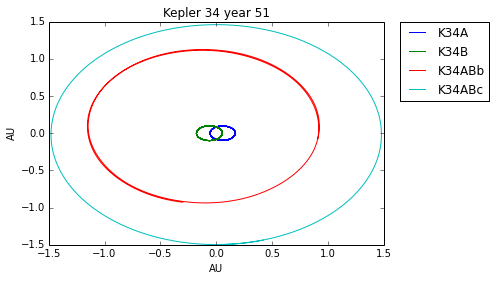

In [23]:
n=interact(plotorbit2,year=(0,years-1,1))

That clearly doesn't do much. What if instead we placed the planet closer to K34(AB)b? Say, at 1.3 AU?

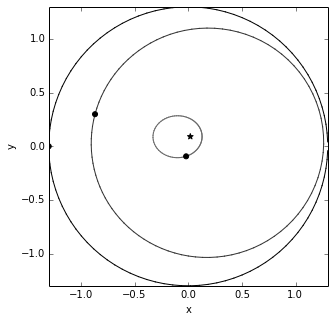

In [24]:
sim.remove(id=4)
mp2 = mp
ap2 = 1.3
sim.add(m=mp2,a=ap2,e=0.,f=np.pi,primary=sim.calculate_com(),id=5)
sim.move_to_com()
orb=rebound.OrbitPlot(sim)

In [25]:
years= 500
tmax = years*2*np.pi
times= np.linspace(0,tmax,num=years*1000)
k34a = np.zeros([2,len(times)])
k34b = np.zeros([2,len(times)])
k34abb = np.zeros([2,len(times)])
#k34abc = np.zeros([2,len(times)])
k34abd = np.zeros([2,len(times)])
i=0
while i<len(times):
    sim.integrate(times[i])
    sim.move_to_com()
    k34a[0][i]=sim.particles[0].x
    k34a[1][i]=sim.particles[0].y
    k34b[0][i]=sim.particles[1].x
    k34b[1][i]=sim.particles[1].y
    k34abb[0][i]=sim.particles[2].x
    k34abb[1][i]=sim.particles[2].y
#    k34abc[0][i]=sim.particles[3].x
#    k34abc[1][i]=sim.particles[3].y
    k34abd[0][i]=sim.particles[3].x
    k34abd[1][i]=sim.particles[3].y
    i+=1
    

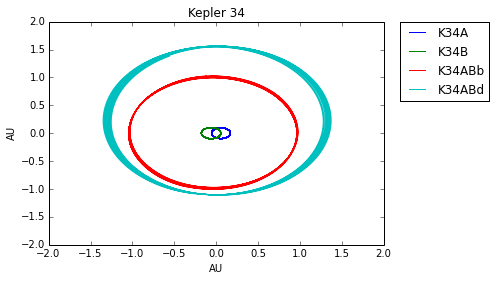

In [26]:
k34ao = plot(k34a[0][0:10000],k34a[1][0:10000],label='K34A')
k34bo = plot(k34b[0][0:10000],k34b[1][0:10000],label='K34B')
k34abbo = plot(k34abb[0][0:10000],k34abb[1][0:10000],label='K34ABb')
#k34abco = plot(k34abc[0][0:10000],k34abc[1][0:10000],label='K34ABc')
k34abdo = plot(k34abd[0][0:10000],k34abd[1][0:10000],label='K34ABd')
ylabel('AU')
xlabel('AU')
xlim(-2,2)
ylim(-2,2)
title('Kepler 34')
l=legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [29]:
global k34abd
def plotorbit3(year):
    t1=year*1000
    t2=(year+1)*1000 #+ 300
    k34ao = plot(k34a[0][t1:t2],k34a[1][t1:t2],label='K34A')
    k34bo = plot(k34b[0][t1:t2],k34b[1][t1:t2],label='K34B')
    k34abbo = plot(k34abb[0][t1:t2],k34abb[1][t1:t2],label='K34ABb')
#    k34abco = plot(k34abc[0][t1:t2],k34abc[1][t1:t2],label='K34ABc')
    k34abdo = plot(k34abd[0][t1:t2],k34abd[1][t1:t2],label='K34ABd')
    xlim(-1.5,1.5)
    ylim(-1.5,1.5)
    xlabel('AU')
    ylabel('AU')
    title('Kepler 34 year '+str(year))
    l=legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

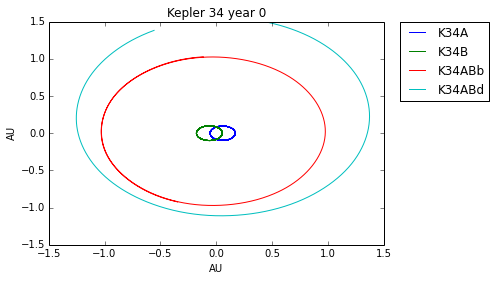

In [30]:
n=interact(plotorbit3,year=(0,500,1))

Now we're talking!

## An inner planet?

Would an inner planet survive? We can find out. Let's place a smaller planet, say 30% of K34(AB)b's mass, at 0.7 AU and see what happens. We'll refresh everything first.

In [49]:
sim2=rebound.Simulation()
aa = 0.22882
ee = 0.52087
ma = 1.0479
mb = 1.0208
ii = 0.4966*np.pi/180.
mp = 2.1e-4
ap = 1.0896
tp = 0.79075154
ep = 0.182
sim2.add(m=ma)
sim2.add(m=mb,a=aa,e=ee,l=300.1970*np.pi/180,primary=sim2.particles[0])
sim2.move_to_com()
sim2.add(m=mp,a=ap,e=ep,inc=ii,Omega=-1.74*np.pi/180.)
sim2.move_to_com()

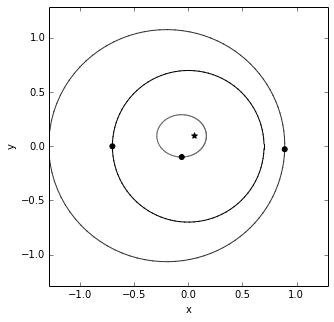

In [50]:
m3 = 0.3*mp
a3 = 0.7
sim2.add(m=m3,a=a3,e=0.,f=np.pi,primary=sim2.calculate_com())
sim2.move_to_com()
rb=rebound.OrbitPlot(sim2)

In [51]:
years= 100
tmax = years*2*np.pi
times= np.linspace(0,tmax,num=years*10000)
k34a = np.zeros([2,len(times)])
k34b = np.zeros([2,len(times)])
k34abb = np.zeros([2,len(times)])
k34abe = np.zeros([2,len(times)])
i=0
while i<len(times):
    sim2.integrate(times[i])
    sim2.move_to_com()
    k34a[0][i]=sim2.particles[0].x
    k34a[1][i]=sim2.particles[0].y
    k34b[0][i]=sim2.particles[1].x
    k34b[1][i]=sim2.particles[1].y
    k34abb[0][i]=sim2.particles[2].x
    k34abb[1][i]=sim2.particles[2].y
    k34abe[0][i]=sim2.particles[3].x
    k34abe[1][i]=sim2.particles[3].y
    i+=1
    

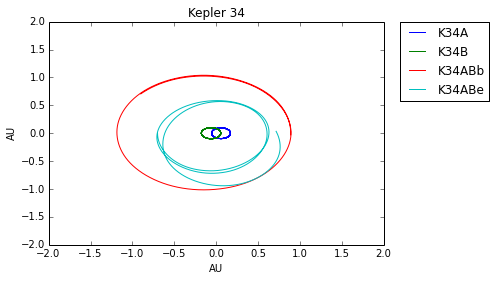

In [52]:
k34ao = plot(k34a[0][0:10000],k34a[1][0:10000],label='K34A')
k34bo = plot(k34b[0][0:10000],k34b[1][0:10000],label='K34B')
k34abbo = plot(k34abb[0][0:10000],k34abb[1][0:10000],label='K34ABb')
k34abeo = plot(k34abe[0][0:10000],k34abe[1][0:10000],label='K34ABe')
ylabel('AU')
xlabel('AU')
xlim(-2,2)
ylim(-2,2)
title('Kepler 34')
l=legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Doesn't look good for our poor little planet, does it?

In [59]:
global k34abe
def plotorbit3(year):
    t1=year*1000
    t2=(year+1)*1000 + 10000
    k34ao = plot(k34a[0][t1:t2],k34a[1][t1:t2],label='K34A')
    k34bo = plot(k34b[0][t1:t2],k34b[1][t1:t2],label='K34B')
    k34abbo = plot(k34abb[0][t1:t2],k34abb[1][t1:t2],label='K34ABb')
    k34abeo = plot(k34abe[0][t1:t2],k34abe[1][t1:t2],label='K34ABe')
    xlim(-1.5,1.5)
    ylim(-1.5,1.5)
    xlabel('AU')
    ylabel('AU')
    title('Kepler 34 year '+str(year*0.1))
    l=legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

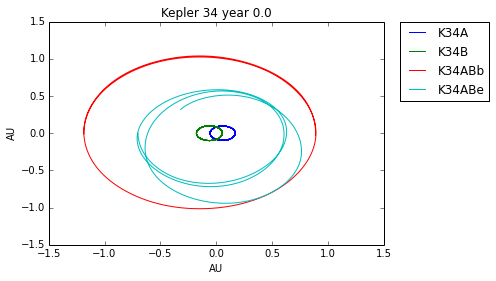

In [60]:
n=interact(plotorbit3,year=(0,1000,1))

Chances are, there aren't really any planets closer in than 1 AU.